## <p style="text-align: right;"> &#9989; Filip Jevtic</p>

# CMSE 202 Midterm (Section 003 - Spring 2020)

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll practice setting up a GitHub repository, committing and pushing repository changes, downloading files with command line tools, using documentation to learn about an unfamiliar function, and understand and edit a python class. You should find that you have all of the skills necessary to complete this exam with even just six weeks of CMSE 202 under your belt!

**You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.  If you get stuck on a problem, move on to the next section and return later.**

At the end of the exam, upload your solutions to D2L push your changes to your git repository. 

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, looking up any past jupyter notebook assignments, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Setting up a repository for tracking changes (20 points)

Before you get too far along in the assignment, you need to set up a new folder in your **private** GitHub repository that you created for the course. You will store this notebook in that folder and track the changes as you make them. For this section you should:

1. Navigate to your local copy of your "`cmse202-s20-turnin`" repository.
2. In the repository, create a new directory called "`midterm`".
3. Move this notebook into that new directory within your repository.
4. Add the notebook file to your git repository with the appropriate git command.
5. Commit the addition to your repository using the appropriate git command.
6. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Make sure that your TA have access to the repository (this should already be the case). Your TA's GitHub username is genster6.**

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up correctly with this new directory, you can always just work on the notebook as is and try to come back and figure out the repository component later. You may lose some points though since you won't have periodic commits as you make progress along the way, but it will be better than not working on the other parts of the exam!

---
## Part 2: Loading/Reading unfamiliar data in Python (10 points)

Your first task is to figure out how to open and read file Tibet_seismic_wavespeeds_perturbations.ascii (downloaded from D2L) using Python. This file is actually ASCII file, which is text file in which each byte represents one character according to the ASCII code. You can use either numpy.loadtxt or pandas to load this file.

There are four columns in file Tibet_seismic_wavespeeds_perturbations.ascii.

**Column 1: longitude (in degrees)**

**Column 2: latitude (in degrees)**

**Column 3: depth (in kilometers)**

**Column 4: seismic wavespeed anomalies (in %)**

The file contains the seismic properties of the Earth's interior (i.e., seismic wavespeed anomalies) on a 3-D grid of regularly spaced points defined by longitude, latitude, and depth.

1. Write the code below to load the .ascii file in python.
2. Once you've loaded the data, print out the minimum and maximum values of depth and seismic wavespeed anomalies.

In [27]:
# Put your code here
import numpy as np
import pandas as pd
tibet = np.loadtxt("Tibet_seismic_wavespeeds_perturbations.ascii")
longitude = tibet.T[0]
latitude = tibet.T[1]
depth = tibet.T[2]
seism = tibet.T[3]
max_depth = np.max(depth)
min_depth = np.min(depth)
max_seism = np.max(seism)
min_seism = np.min(seism)
print("The max depth is: ",max_depth," and the min depth is: ",min_depth)
print("The max seismic wavespeed anomaly is: ", max_seism, " and the min seismic wavespeed anomaly is: ",min_seism)

The max depth is:  800.0  and the min depth is:  80.0
The max seismic wavespeed anomaly is:  6.4912  and the min seismic wavespeed anomaly is:  -7.0826


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 2". 
---

## Part 3: Visualize the data ( 15 points) 

**3.** What does this data look like? **Make a slice map of seismic wavespeed anomalies by extracting the longitudes, latitudes, and seismic wavespeed anomalies at a depth of 80 km. The depth slice map can be made using a scatter plots where the colors are defined by the seismic wavespeed anomalies and using the longitude values as X axis and latitude values as Y axis. (15 points)**

**Hint:** you can use `np.where()` to find the indices where the depth values are equal to 80 and then used those indices to make your plot.

Your scatter plot should look something like the following:

<img src="https://i.imgur.com/VZFaJJQ.png">

Text(0.5,1,'depth = 80 km')

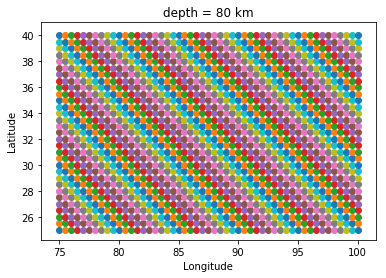

In [98]:
# Put your code here
import matplotlib.pyplot as plt
import matplotlib.cm as cm
where = np.where(depth == 80)[0]
color = []
for i in where:
    cmap.append(seism[i])
color = np.array(cmap)
colors = cm.rainbow(np.linspace(0, 1, len(color)))

for i in where:
    plt.scatter(longitude[i],latitude[i])
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("depth = 80 km")

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 3". 
---

## Part 4: Draw a weighted graph by reading in the weighted edge list. (10 points)

Please use the provided weighted edge list (weighted_edge_list.txt) to read a graph as a list of edges with numeric weights. Draw a network of nodes and use the thickness of the edges between the nodes to denote the weight information. Please also label the nodes.
You may find the following links useful.

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.readwrite.edgelist.read_weighted_edgelist.html

https://qxf2.com/blog/drawing-weighted-graphs-with-networkx/

Your graph should look something like the following:
<img src="https://i.imgur.com/yVkeyPI.png">

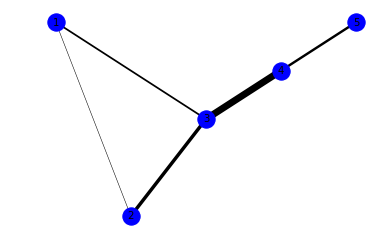

In [67]:
# Put your code here
%matplotlib inline
import networkx as nx
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning)


G = nx.Graph()
nodes = [1,2,3,4,5]
for node in nodes:
    G.add_node(node)


pos={1:(0,0),2:(1,-4),3:(2,-2),4:(3,-1),5:(4,0)}
nx.draw_networkx_nodes(G,pos,node_color='blue')

labels = {}
for name in nodes:
    labels[name] =str(name)
nx.draw_networkx_labels(G,pos,labels,font_size=10)


G.add_edge(nodes[0],nodes[1],weight=15)
G.add_edge(nodes[0],nodes[2],weight=50)
G.add_edge(nodes[1],nodes[2],weight=100)
G.add_edge(nodes[2],nodes[3],weight=200) 
G.add_edge(nodes[3],nodes[4],weight=70) 
 
weight_list = []

for (first_node,sec_node,data) in G.edges(data=True):
    weight_list.append(data['weight'])
    
unique = list(set(weight_list))

for weight in unique:
    weighted_edges = [(first_node,sec_node) for (first_node,sec_node,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(nodes)*3.0/sum(weight_list)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
    plt.axis('off')


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 4".
---

## Part 5: Use Euler's method and Midpoint method to solve an ordinary differential equation (ODE) (25 points)

Suppose we have an ODE of the form:
\begin{equation}
\frac{d y}{d t}  = y - t^2 + 1  
\end{equation}

with time $t$ in the domain of $0 \leqslant t \leqslant 2.0$ and the initial condition (when $t_0 = 0$) of \begin{equation} y(0) = 0.5 \end{equation} 

You can generate approximate solutions of the ODE at some regular grid of time steps ($t_i = t_0 + ih$) using numerical methods, such as the [Euler's method](https://en.wikipedia.org/wiki/Euler_method) and the [Midpoint method](https://en.wikipedia.org/wiki/Midpoint_method).

Assume that there are N time steps between the starting time $t_0 = 0$ and the end time $t_e = 2.0$, then the step size is given by $h =  (t_e - t_0)/N $ and $i = 0, 1 , 2, ..., N$.

For reference, the exact (analytical) solution of the ODE is:
\begin{equation}
y(t)  = ( t + 1) ^2 - 0.5e^t  
\end{equation}

**5.1 Define a function of the exact solution and plot the exact solution on regular grid of time steps between $t_0 = 0$ and $t_e = 2.0$ with number of time steps of N = 10. (7 points)**

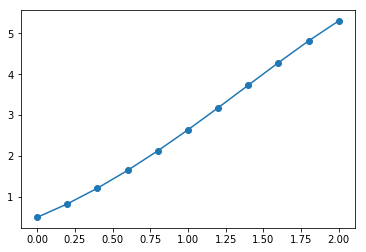

In [71]:
# Put your code here
import math

def exact(t0,te,n):
    exact_list = []
    t_list = []
    steps = (te-t0)/n
    while t0 <= te:
        result = (t0 + 1)**2 - 0.5*math.exp(t0)
        exact_list.append(result)
        t_list.append(t0)
        t0 += steps
    return t_list,exact_list
t,exact_val = exact(0,2,10)
plt.scatter(t,exact_val)
plt.plot(t,exact_val)
        
        

**5.2 Use the [Euler's method](https://en.wikipedia.org/wiki/Euler_method) to solve the equation. Plot the numerical solution from Euler's method against the exact solution between $t_0$ and $t_e$ on regular grid of time steps with number of time steps N = 10. (7 points)**

In [ ]:
# Put your code here
time = np.arange


**5.3 Use the [Midpoint method](https://en.wikipedia.org/wiki/Midpoint_method) to solve the euqation. Plot the numerical solution from midpoint method along with the solution from the Euler's method and the exact solution. Please still use the number of time steps of N = 10. (6 points)**

In [ ]:
# Put your code here

**5.4 Error of the numerical solutions (5 points)**
1. Please calculate and print out the error of the numerical solution at the end time $t_e = 2.0$ for the Euler's method and the midpoint method respectively with number of time steps of N = 10. The error can be defined as the absolute difference between the numerical solution and the exact solution.
2. If you compare the errors resulted from both methods, you will find that the midpoint method has smaller error thus higher accuracy. In order for Euler's method to obtain the same accuracy as the Midpoint method with N = 10, please try a set of N values for the Euler's method (N = 100, 200, 300, 400, 500, 600, 700, 800) and determine which of these N values can result an error equal or less than the error from the Midpoint method (assume the Midpoint method still uses N = 10).

In [ ]:
# Put your code here

---
## Part 6: Writing a simple Python class (20 points)

For this section, you're going to expand on the pre-existing Python class contained in the cell below. The class is called `Volcano` and, not surprisingly, it is designed to store information about an individual volcano and currently just includes one simple method, one that returns the volcano's ID number (volcano_id). Using this class as a starting point, you goal is to do the following:

* Add two new attributes, `country` and ` likelihood_of_an_eruption` to the class so that it is defined when the class object is first initialized. These attributes define in which country the volcano is located and the estimated likelihood of a future eruption, i.e., a value assigned between 0 and 1 and with 1 indicating the volcano being most likely to erupt. 
* Modify and replace `get_volcano_id` with a new class method, `get_volcano_id_likelihood`, that returns both the volcano_id and likelihood_of_an_eruption.
* Add a new class method, `identify_volcano_type`, that takes as input a list of seven volcano types (volcano_types = ['dome', 'cone', 'crater', 'vent', 'shield', 'caldera', 'stratovolcano']
) and adds one of them (randomly selected) as an attribute to the volcano.
* Add a new class method, `display_volcano_type`, that prints out: <br>
"Volcano < volcano_id > in < country > is a < volcano_type >" <br>
where the < volcano_type > part is filled in with the volcano type from the volcano type list added by the `identify_volcano_type` method.

Then, **using the `volcano_list` provided below, create a list of `Volcano` objects that contain the information for each volcano. Using your list of volcanos, randomly identify each of them in one of those seven volcano types mentioned above** You should identify the volcanoes using your `identify_volcano_type` method.

Once you've identified all of your volcanoes, **use your volcano list to print the relevant information for every volcano using your `identify_volcano_type` method**:

Finally, **print the list of volcano_id sorted by the the likelihood_of_an_eruption from most likely to unlikely. Note: you must use the class method `get_volcano_id_likelihood` to get the values of volcano_id and likelihood_of_an_eruption.**

In [84]:
# The Volcano class (you'll edit and expand on this)
class Volcano():
    '''
    This class is designed to include information about individual volcano.
    Currently this class has the following attributes:
    
    volcano_id : this is the id of the volcano
    '''
    
    def __init__(self, volcano_id='',country = '', likelihood_of_an_eruption = 0):
        self.volcano_id = volcano_id
        self.country = country
        self.likelihood_of_an_eruption = likelihood_of_an_eruption
        
    def get_volcano_id_likelihood(self):
        '''
        This function returns the id of the volcano
        '''
        return (self.volcano_id,self.likelihood_of_an_eruption)
    
    def identify_volcano_type(self,volcano_types = ['dome', 'cone', 'crater', 'vent', 'shield', 'caldera', 'stratovolcano']):
        self.volcano_type = np.random.choice(volcano_types)
        
    def display_volcano_type(self):
        print("Volcano ",self.volcano_id," in,",self.country," is a ",self.volcano_type)

In [85]:
# This is your list of fictitious volcanos
# The information provided is: volcano_id, country, likelihood_of_an_eruption 
volcano_list = [['20020', 'U.S.', 0.5],
          ['20010', 'Japan', 1],
          ['19990', 'China', 0.3],
          ['20100', 'India', 0.7],
          ['20190', 'Russia', 0.6],
          ['19970', 'France', 0.4]]
# Here we provide the list of volcano types.
volcano_types = ['dome', 'cone', 'crater', 'vent', 'shield', 'caldera', 'stratovolcano']


In [88]:
# Put your code here
volcanoes = []
id_likelihood = []
for v in volcano_list:
    volcano = Volcano(volcano_id = v[0],country = v[1],likelihood_of_an_eruption = v[2])
    volcanoes.append(volcanoes)
    volcano.identify_volcano_type()
    volcano.display_volcano_type()
    id_likelihood.append(volcano.get_volcano_id_likelihood())
print()
print(sorted(id_likelihood,key = lambda x: x[1],reverse = True))

Volcano  20020  in, U.S.  is a  dome
Volcano  20010  in, Japan  is a  shield
Volcano  19990  in, China  is a  vent
Volcano  20100  in, India  is a  vent
Volcano  20190  in, Russia  is a  vent
Volcano  19970  in, France  is a  shield

[('20010', 1), ('20100', 0.7), ('20190', 0.6), ('20020', 0.5), ('19970', 0.4), ('19990', 0.3)]


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 6".
---

## You're done! Congrats on finishing your CMSE 202 Midterm!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.